In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.rcParams["font.family"] = "Malgun Gothic"

C:\Users\SSAFY\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


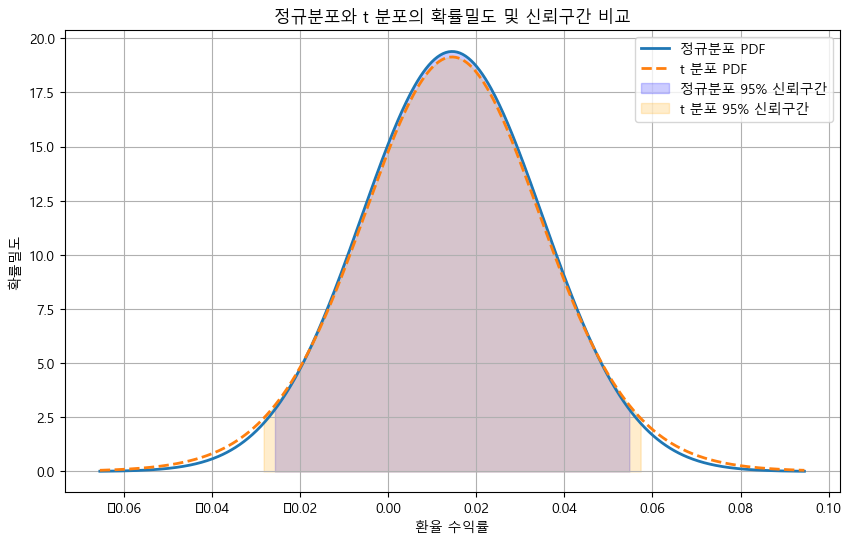

In [2]:
# 1. 데이터 설정
data = np.array([0.1, -0.05, 0.03, -0.02, 0.12, -0.09, 0.07, -0.04, 0.03, 0.11,
                 -0.15, 0.2, -0.13, 0.05, -0.03, 0.08, -0.07, 0.1, -0.06, 0.04])

# 2. 평균(mean)과 표준편차(std) 계산
mean = np.mean(data) # 샘플 평균
std = np.std(data, ddof=1) # 샘플 표준편차 (ddof=1 : 자유도 보장)
n = len(data) # 샘플 개수 (n=20)

# 3. 신뢰구간 계산 (95%)
normal_interval = stats.norm.interval(0.95, mean, std/np.sqrt(n)) # 정규분포 신뢰 구간
t_interval = stats.t.interval(0.95, df=n-1, loc=mean, scale=std/np.sqrt(n)) # t-분포 신뢰 구간

# 4. x축 범위 설정
x = np.linspace(mean - 0.08, mean + 0.08, 500)

# 5. 정규분포 및 t-분포 PDF 계산
normal_pdf = stats.norm.pdf(x, mean, std/np.sqrt(n)) # 정규분포 PDF
t_pdf = stats.t.pdf(x, df=n-1, loc=mean, scale=std/np.sqrt(n)) # t-분포 PDF

# 6. 그래프 그리기
plt.figure(figsize=(10, 6))

# 정규분포 PDF 그래프
plt.plot(x, normal_pdf, label='정규분포 PDF', linewidth=2)

# t 분포 PDF 그래프 (점선 스타일)
plt.plot(x, t_pdf, label='t 분포 PDF', linewidth=2, linestyle='--')

# 7. 신뢰구간 시각화 (정규분포 신뢰구간)
plt.fill_between(x, normal_pdf,
                 where=(x >= normal_interval[0]) & (x <= normal_interval[1]),
                 color='blue', alpha=0.2, label='정규분포 95% 신뢰구간')

# t 분포 신뢰구간 색칠 (정확히 t 분포 구간만)
plt.fill_between(x, t_pdf,
                 where=(x >= t_interval[0]) & (x <= t_interval[1]),
                 color='orange', alpha=0.2, label='t 분포 95% 신뢰구간')

# 8. 그래프 설정 및 출력
plt.legend() #범례 추가
plt.xlabel('환율 수익률') # X축 라벨
plt.ylabel('확률밀도') # Y축 라벨
plt.title('정규분포와 t 분포의 확률밀도 및 신뢰구간 비교') # 그래프 제목
plt.grid(True) # 그리드 추가
plt.show() # 그래프 출력